### 옷 분리
    
    최초 작성일 : 20/03/09
    작성자 : 양희승
    
    작성내용 : 무신사 이미지를 통해 옷 색깔 판별하기 위한 옷분리 코드
    
    
    수정내용 :
        전체 코드 수정
        
        20/03/20
            - 분리코드 수정
            - DB 적재 코드 추가
            - 옷 색 판별 코드 추가
            
        20/03/23
            - 옷 분리결과 데이터 검토 (김은주)
              1) 예측값 seq 데이터 확인 (seq = self.model.predict(file))
                 - seq[0] : (1, 32, 32, 1)
                 - seq[1] : (1, 64, 64, 1)
                 - seq[2] : (1, 128, 128, 1)
                 - seq[3] : (1, 512, 512, 1)
                 → 0~1사이 0~3 단계별 필터로 예상
                 → 최종 필터
                 → 원본 배열화 이미지(rgb)에 병합해 alpha값으로 이용
              2) 결과값 rgbs 데이터 확인 (rgbs = np.concatenate((cfx,seq*255.),axis=-1))
                  - rgbs[0~3] 각 R, G, B, ALPHA 값
                  - 이미지 데이터는 r, g, b, alpha 순서로 각 0~255 수치로 표현
                  - cv 데이터는 각 b, g, r, alpha 슌서로 각 0~1 수치로 표현
              
            → 이미지 파일 저장 시 처리결과 그대로 저장
                : img_RGBA = cv.merge((r_channel, g_channel, b_channel, alpha_channel))
            → 이미지 cv로 데이터 사용 시 BGRA2RGBA로 변환 후 사용
                : img_BGRA = cv.merge((b_channel, g_channel, r_channel, alpha_channel))/255

In [3]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
import sys
import os
import time
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from io import BytesIO
from PIL import Image
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
# f = sys.argv[1]
# idx = int(sys.argv[1])
model = load_model("Fashion-AI/model/topwears.h5")
idx = int(input("숫자만 입력 : "))
files = os.listdir("Fashion-AI/input/")
# f = "Fashion-AI/input/"+files[i]
# o = "Fashion-AI/output/"+files[i].replace(".jpg", "")

숫자만 입력 : 1


In [65]:
## 최종 코드 정리
class fashion_tools(object):
    def __init__(self,imageid,version=1.1):
        self.imageid = imageid
#         self.model   = model
        self.model = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb----> return PNG"""
        name =  self.imageid
        file = cv.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)        
        
        ## cv.merge로 데이터 합치기
        r_channel, g_channel, b_channel = cv.split(rgb)
        alpha_channel = seq*255
        ## 파일 저장 용도
        img_RGBA = cv.merge((r_channel, g_channel, b_channel, alpha_channel))
        ## cv 데이터 사용 용도
        img_BGRA = cv.merge((b_channel, g_channel, r_channel, alpha_channel))/255
        
        
        return img_RGBA, img_BGRA
        
        
    def get_patch(self):
        return None
    
    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")



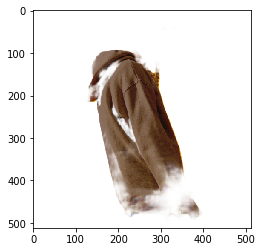

total time :  1.0212619304656982 초


In [66]:
start_time = time.time()

for i in range(idx) :
    f = "Fashion-AI/input/70119.jpg"
    o = "Fashion-AI/output/"+files[i].replace(".jpg", "")
    api    = fashion_tools(f)
    
    image_for_save, image_for_use = api.get_dress(False)
    
    cv.imwrite(o+"aa.png",image_for_save)
    plt.imshow(image_for_use) # cv 데이터 이용용도 
    plt.show()
    
end_time = time.time()
print("total time : ", end_time - start_time, "초")

In [57]:
# class fashion_tools(object):
#     def __init__(self,imageid,version=1.1):
#         self.imageid = imageid
# #         self.model   = model
#         self.model = model
#         self.version = version
        
#     def get_dress(self,stack=False):
#         """limited to top wear and full body dresses (wild and studio working)"""
#         """takes input rgb----> return PNG"""
#         name =  self.imageid
#         file = cv.imread(name)
#         file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
#         rgb  = file.numpy()
# #         print(rgb[200:300, 200:300, :]) ## 512*512*3 / 원본이지만! imshow에서는 255로 안나눠져서 전부 흰색으로 튀나옴
# #         return rgb
#         file = np.expand_dims(file,axis=0)/ 255.
# #         print(file[:, 200:300, 200:300, :]) ## 1*512*512*3
# #         return file.reshape(512, 512, 3) ## 255로 나눈거라서 imshow에서 확인 됨  / 저장하면 GG

        
#         seq = self.model.predict(file)
#         """model에서 shape을 512*512*3으로 맞춰놔서 file shape은 수정 모대 꼭 512*512*3이어야 함"""
# #         return seq[0].reshape(seq[0].shape[1], seq[0].shape[2])
# #         return seq[1].reshape(seq[1].shape[1], seq[1].shape[2])
# #         return seq[2].reshape(seq[2].shape[1], seq[2].shape[2])
# #         return seq[3].reshape(seq[3].shape[1], seq[3].shape[2])
# #         print(seq[0]) ## (1, 32, 32, 1) / 1차 필터 적용한 결과
# #         print(seq[1][:, 200:300, 200:300, :]) ## (1, 64, 64, 1) / 2차필터 적용한 결과
# #         print(seq[2][:, 200:300, 200:300, :]) ## (1, 128, 128, 1) / 3차필터 적용한 결과 이런식인거 같은데
# #         print(seq[3][:, 200:300, 200:300, :]) ## (1, 512, 512, 1)
        
        
#         seq = seq[3][0,:,:,0]
#         seq = np.expand_dims(seq,axis=-1)
#         """seq[3][0,:,:,0] 차원 축소 OK / 값 바뀌는거 없ㅇㅇ"""
# #         return seq.reshape(512, 512)


        
# #         ## alpha값(seq) 조정
# #         seq[seq>0.01] = 1
# #         seq[seq<=0.01] = 0
# #         print(np.unique(seq))

        
        
#         c1x = rgb*seq
#         c2x = rgb*(1-seq)
#         cfx = c1x+c2x
#         """원본(rgb)이랑 같은 값 맞는디요 / 차이가 나봤자 0.00001 이런차이"""
# #         print(rgb.reshape(512, 512, 3)[rgb.reshape(512, 512, 3)!=cfx])
# #         print(cfx[rgb.reshape(512, 512, 3)!=cfx])
# #         return file.reshape(512, 512, 3)[file.reshape(512, 512, 3)!=cfx]
# #         return cfx[file.reshape(512, 512, 3)!=cfx]
# #         return cfx
        
#         dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
#         rgbx = np.concatenate((rgb,dummy*255),axis=-1)
# #         rgbs = np.concatenate((cfx,seq*255.),axis=-1)
#         rgbs = np.concatenate((cfx,seq*255.),axis=-1)
#         rgbstack = np.dstack((cfx,seq*255.))
#         """concat이랑 dstack이랑 모든 행,열,면 결과물 동일"""
# #         print(rgbs[rgbs != rgbstack])
# #         print(rgbstack[rgbs != rgbstack])
#         """cfx랑 concat&dstack한 값의 rgb부분 모든 행,열면 결과물 동일"""
# #         print(rgbs[:, :, :3][rgbs[:, :, :3]!=cfx])
# #         print(rgbstack[:, :, :3][rgbstack[:, :, :3]!=cfx])

        
#         ## cv.merge로 데이터 합치기
#         r_channel, g_channel, b_channel = cv.split(cfx)
#         alpha_channel = seq*255
#         ## 파일 저장 용도
#         img_RGBA = cv.merge((r_channel, g_channel, b_channel, alpha_channel))
#         ## cv 데이터 사용 용도
#         img_BGRA = cv.merge((b_channel, g_channel, r_channel, alpha_channel))/255
        
        
#         if stack:
#             stacked = np.hstack((rgbx,rgbs))
#             return stacked
#         else:
# #             return rgbs
# #             return rgbstack
#             return img_RGBA, img_BGRA
        
        
#     def get_patch(self):
#         return None
    
#     def development(self):
#         n_ = '\n'
#         return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")



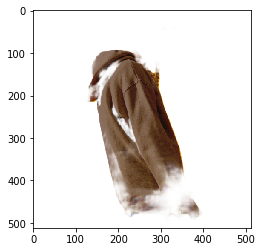

total time :  1.0282175540924072 초


In [58]:
# start_time = time.time()

# for i in range(idx) :
    
# #     f = "Fashion-AI/input/"+files[i]
# #     test = cv.imread(f)
# #     plt.imshow(test)
# #     plt.show()
#     f = "Fashion-AI/input/70119.jpg"
# #     o = "Fashion-AI/output/"+files[i].replace(".jpg", "")
#     o = "Fashion-AI/output/70119"
#     api    = fashion_tools(f)
    
# #     image_ = api.get_dress(True)
#     image_for_save, image_for_use = api.get_dress(False)
# #     img = Image.open(image_) ## 배열값은 이미지.오픈에서 사용할 수 없는 데이터타입입니다~

# #     img = cv.cvtColor(image_, cv.COLOR_)
# #     img = cv.cvtColor(image_, cv.COLOR_BGR2BGRA)
# #     img = cv.cvtColor(image_, cv.COLOR_BGRA2RGBA)
    
# #     plt.subplot(1, 2, 1)
# #     plt.imshow(image_)
# #     plt.imshow(cv.cvtColor(image_, cv.COLOR_BGRA2RGBA)/255)
#     plt.imshow(image_for_use) # cv 데이터 이용용도 
    
# #     plt.subplot(1, 2, 2)
# #     plt.imshow(img)
# #     plt.imshow(img/255)
    
#     plt.show()
# #     print("-----------------------------------------", str(i+1), "완료")
# #     print("")


#     cv.imwrite(o+"aa.png",image_for_save)
# #     cv.imwrite(o+"bb.png",img)
# #     cv.imwrite(o+".jpg", img)
    
# end_time = time.time()
# print("total time : ", end_time - start_time, "초")

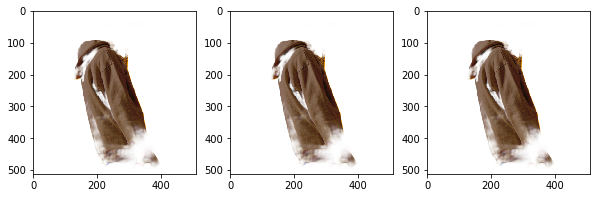

In [447]:
# ### alpha 값 병합
# img_1 = Image.open("Fashion-AI/output/70119aa_cv-merge-ver.png")
# img_2 = Image.open("Fashion-AI/output/70119aa_np-concat-ver.png")
# img_3 = Image.open("Fashion-AI/output/70119aa_np-dstack-ver.png")

# plt.figure(figsize=(10, 3))
# plt.subplot(1, 3, 1)
# plt.imshow(np.array(img_1))
# plt.subplot(1, 3, 2)
# plt.imshow(np.array(img_2))
# plt.subplot(1, 3, 3)
# plt.imshow(np.array(img_3))

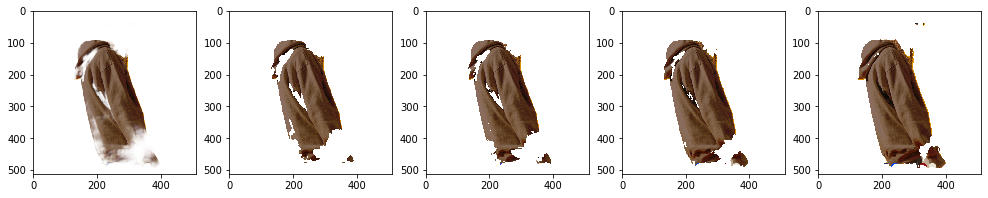

In [448]:
# img_1 = Image.open("Fashion-AI/output/alpha_origin_70119aa.png")
# img_2 = Image.open("Fashion-AI/output/alpha0.5_70119aa.png")
# img_3 = Image.open("Fashion-AI/output/alpha0.7_70119aa.png")
# img_4 = Image.open("Fashion-AI/output/alpha0.9_70119aa.png")
# img_5 = Image.open("Fashion-AI/output/alpha0.99_70119aa.png")

# plt.figure(figsize=(17, 3))
# plt.subplot(1, 5, 1)
# plt.imshow(np.array(img_1))
# plt.subplot(1, 5, 2)
# plt.imshow(np.array(img_2))
# plt.subplot(1, 5, 3)
# plt.imshow(np.array(img_3))
# plt.subplot(1, 5, 4)
# plt.imshow(np.array(img_4))
# plt.subplot(1, 5, 5)
# plt.imshow(np.array(img_5))

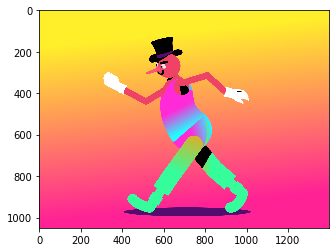

In [450]:
# img = Image.open("Fashion-AI/output/apng1.png")
# plt.imshow(np.array(img))

(600, 500, 3)


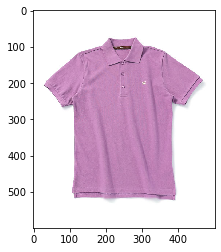

----------------------------------------- 0 완료

total time :  10.55115818977356 초


In [57]:





# img = cv.imread("Fashion-AI/input/100123.jpg")
# print(img.shape)
# plt.imshow(img)
# plt.show()
# # api    = fashion_tools(f)    
# # image_ = api.get_dress(False)
# # img = image_
# # img = cv.cvtColor(img, cv.COLOR_RGBA2RGB)
# # print(img)
# #     plt.imshow('', img)
# #     plt.show()
# #     plt.imshow('', img)
# #     plt.show()
# print("-----------------------------------------", str(i), "완료")
# print("")

# #     print(api.development())
# #     cv.imwrite(o+".png",image_)
    
# end_time = time.time()
# print("total time : ", end_time - start_time, "초")

In [5]:
# 배경색처리 - 8번 오류
# cv2.namedWindow(‘image’, cv2.WINDOW_NORMAL)

def kim(i) :
    file_name = str(i)
    img = cv.imread("img/clothes_test/"+file_name+".jpg")
    #Load the Image
    imgo = img
    height, width = imgo.shape[:2]

    #Create a mask holder
    mask = np.zeros(imgo.shape[:2],np.uint8)

    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    #Hard Coding the Rect… The object must lie within this rect.
    rect = (10,10,width-30,height-30)
    cv.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype("uint8")
    img1 = imgo*mask[:,:,np.newaxis]

    #Get the background
    background = imgo-img1

    #Change all pixels in the background that are not black to white
    background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

    #Add the background and the image
    final = background + img1

    #To be done – Smoothening the edges….

    # plt.imshow("image", final )
    cv.imwrite("img/clothes_test/ext_"+file_name+".jpg", final)
#     plt.imshow(final)
#     plt.show()

for i in range(31) :
    kim(i)

[  0 255]


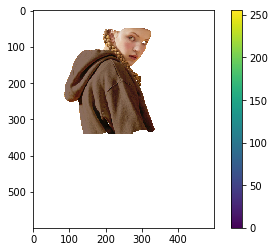

(<matplotlib.image.AxesImage at 0x1f409ecc9c8>,
 None)

In [429]:
img = cv.imread('Fashion-AI/input/70119.jpg')

mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
rect = (50, 50, 450, 290)

# Grabcut 
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

r_channel, g_channel, b_channel = cv.split(img) 
a_channel = np.where((mask==2)|(mask==0), 0, 255).astype('uint8')  
print(np.unique(a_channel))

img_RGBA = cv.merge((r_channel, g_channel, b_channel, a_channel))
cv.imwrite("Fashion-AI/output/test.png", img_RGBA)

# Now for plot correct colors : 
img_BGRA = cv.merge((b_channel, g_channel, r_channel, a_channel))

plt.imshow(img_BGRA), plt.colorbar(),plt.show()